In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [4]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
df = pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.value_counts('TenYearCHD')

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [10]:
X = df.drop(columns = "TenYearCHD")
Y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [26]:
model2 = make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),

    DecisionTreeClassifier(max_depth = 4, random_state=42)
)

model2.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [27]:
model2.score(X_train, y_train)

0.8547733136748986

Max Depth: 1, Training Accuracy: 0.85, Validation Accuracy: 0.84
Max Depth: 2, Training Accuracy: 0.85, Validation Accuracy: 0.84
Max Depth: 3, Training Accuracy: 0.85, Validation Accuracy: 0.84
Max Depth: 4, Training Accuracy: 0.85, Validation Accuracy: 0.84
Max Depth: 5, Training Accuracy: 0.87, Validation Accuracy: 0.84
Max Depth: 6, Training Accuracy: 0.87, Validation Accuracy: 0.83
Max Depth: 7, Training Accuracy: 0.87, Validation Accuracy: 0.82
Max Depth: 8, Training Accuracy: 0.88, Validation Accuracy: 0.83
Max Depth: 9, Training Accuracy: 0.89, Validation Accuracy: 0.82
Max Depth: 10, Training Accuracy: 0.91, Validation Accuracy: 0.82
Max Depth: 11, Training Accuracy: 0.92, Validation Accuracy: 0.80
Max Depth: 12, Training Accuracy: 0.93, Validation Accuracy: 0.79
Max Depth: 13, Training Accuracy: 0.95, Validation Accuracy: 0.78
Max Depth: 14, Training Accuracy: 0.96, Validation Accuracy: 0.79
Max Depth: 15, Training Accuracy: 0.97, Validation Accuracy: 0.78
Max Depth: 16, Trai

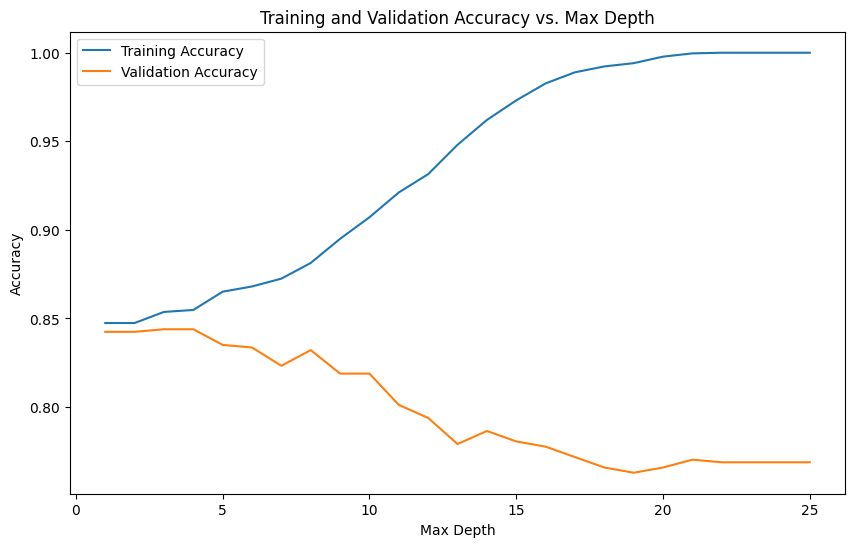

In [23]:
def evaluate_max_depth(X_train, y_train, X_val, y_val, max_depth_range=24):
    training_accuracies = []
    validation_accuracies = []

    for d in range(1, max_depth_range + 1):
        model = make_pipeline(
            SimpleImputer(),
            OrdinalEncoder(),
            DecisionTreeClassifier(max_depth=d, random_state=42)
        )

        model.fit(X_train, y_train)

        # Training accuracy
        train_pred = model.predict(X_train)
        train_acc = accuracy_score(y_train, train_pred)
        training_accuracies.append(train_acc)

        # Validation accuracy
        val_pred = model.predict(X_val)
        val_acc = accuracy_score(y_val, val_pred)
        validation_accuracies.append(val_acc)

        print(f"Max Depth: {d}, Training Accuracy: {train_acc:.2f}, Validation Accuracy: {val_acc:.2f}")

    return training_accuracies, validation_accuracies

# Evaluate max depths from 1 to 25
training_accuracies, validation_accuracies = evaluate_max_depth(X_train, y_train, X_val, y_val)

# Store the values in training_list and validation_list
training_list = training_accuracies
validation_list = validation_accuracies

# Optional: plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), training_list, label='Training Accuracy')
plt.plot(range(1, 25), validation_list, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Max Depth')
plt.legend()
plt.show()

In [30]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_over, y_train_over, test_size=0.2, random_state=42
)

(3698, 15)


In [32]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier()
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])


In [33]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.93108108 0.95945946 0.9527027  0.9594046  0.96346414]


In [35]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10,50,10),
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [40]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [41]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [42]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278513,0.050200,0.016613,0.005597,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.868919,0.882432,0.883784,0.864682,0.894452,0.878854,0.010770,24
1,0.277389,0.057525,0.023317,0.009996,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.864865,0.886486,0.890541,0.887686,0.876861,0.881288,0.009412,23
2,0.713809,0.228722,0.042368,0.011387,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.868919,0.895946,0.890541,0.874154,0.894452,0.884802,0.011099,21
3,0.822070,0.132272,0.049386,0.018517,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.863514,0.879730,0.901351,0.884980,0.889039,0.883723,0.012369,22
4,1.045095,0.352641,0.044932,0.021953,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.872973,0.890541,0.885135,0.883627,0.901218,0.886699,0.009229,20
5,0.718151,0.048728,0.037576,0.012237,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.877027,0.889189,0.898649,0.890392,0.897158,0.890483,0.007668,19
6,0.236957,0.037716,0.017087,0.005910,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.925676,0.940541,0.944595,0.947226,0.945873,0.940782,0.007877,17
7,0.199483,0.002447,0.012501,0.000759,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.920270,0.936486,0.955405,0.940460,0.948579,0.940240,0.011937,18
8,0.380294,0.010636,0.020195,0.002104,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.928378,0.951351,0.951351,0.962111,0.958051,0.950249,0.011682,12
9,0.378489,0.009350,0.019572,0.001298,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.933784,0.955405,0.952703,0.962111,0.960758,0.952952,0.010182,4


In [43]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8219


In [44]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=75))])